# SMS spam classification using NLP

## Reading data and visualization

In [1]:
## import modules

In [2]:
import pandas as pd
import nltk

### Reading the dataset

In [3]:
df=pd.read_csv('spam.csv', encoding='latin-1')

In [4]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [7]:
df.rename(columns={'v1':'class', 'v2':'sms'}, inplace=True)
df.sample(10)

,class,sms
1631,ham,We not watching movie already. Xy wants 2 shop...
910,ham,My love ! How come it took you so long to leav...
4207,ham,Or i go home first lar ?_ wait 4 me lor.. I pu...
4494,ham,Hope this text meets you smiling. If not then ...
403,ham,None of that's happening til you get here though
4980,ham,I said its okay. Sorry
2639,ham,Why she wants to talk to me
887,ham,Y dun cut too short leh. U dun like ah? She fa...
2924,ham,Are you coming to day for class.
1057,ham,Ard 515 like dat. Y?


In [8]:
df.groupby('class').describe()

sms                                                               
      count unique                                                top freq
class                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [9]:
df = df.drop_duplicates(keep='first')
df.groupby('class').describe()

sms                                                               
      count unique                                                top freq
class                                                                     
ham    4516   4516  Go until jurong point, crazy.. Available only ...    1
spam    653    653  Free entry in 2 a wkly comp to win FA Cup fina...    1

## Data Visualization

In [10]:
df['Length'] = df['sms'].apply(len)
df.head(5)

,class,sms,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

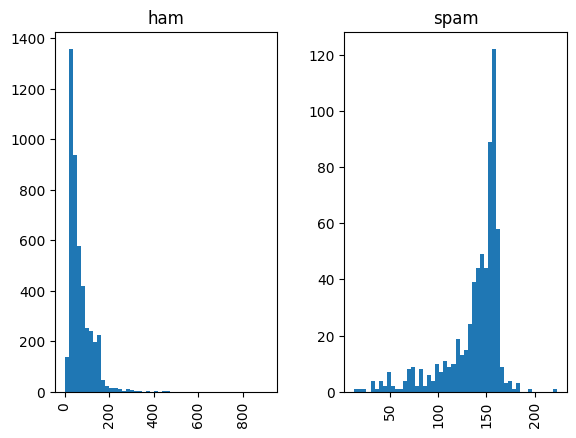

In [11]:
df.hist(column='Length', by='class', bins=50)

## Data Preprocessing

In [12]:
from nltk.stem.porter import PorterStemmer

nltk.download('stopwords')

from nltk.corpus import stopwords

nltk.download('punkt')
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to C:\Users\THIS
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\THIS
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
df.head()

,class,sms,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


### Preprocessing tasks
      #### Lower Case
      #### Tokernization
      #### Removing special character
      #### Removing the punctutations, and stop words
      #### Stemming

In [14]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Initialize stemmer and stop words
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Tokenize the text
    text = nltk.word_tokenize(text)

    # Remove non-alphanumeric tokens
    y = [i for i in text if i.isalnum()]

    # Remove stopwords and punctuation
    y = [i for i in y if i not in stop_words and i not in string.punctuation]

    # Apply stemming
    y = [ps.stem(i) for i in y]

    # Join the tokens back into a single string
    return " ".join(y)

# Assuming df is your DataFrame and 'sms' is the column to be cleaned
df['sms_cleaned'] = df['sms'].apply(clean_text)


[nltk_data] Downloading package punkt to C:\Users\THIS
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\THIS
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
df.head(200)

,class,sms,Length,sms_cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though
...,...,...,...,...
197,ham,is your hamster dead? Hey so tmr i meet you at...,64,hamster dead hey tmr meet 1pm orchard mrt
198,ham,Hi its Kate how is your evening? I hope i can ...,131,hi kate even hope see tomorrow bit bloodi baby...
199,ham,"Found it, ENC &lt;#&gt; , where you at?",40,found enc lt gt
200,ham,I sent you &lt;#&gt; bucks,28,sent lt gt buck


## Feature Extraction

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vec= TfidfVectorizer(max_features=2)
X= tf_vec.fit_transform(df['sms_cleaned']).toarray()
y=tf_vec.fit_transform(df['class']).toarray()
y

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [17]:
X.shape

(5169, 2)

In [18]:
Y = df['class'].copy()

In [19]:
Y.head()

0     ham
1     ham
2    spam
3     ham
4     ham
Name: class, dtype: object

## Learning / Training the model

In [20]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X, Y, test_size=0.2, random_state=42)


In [21]:
X_train

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [22]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [23]:
from sklearn.metrics import  accuracy_score
y_pred= model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8597678916827853


In [24]:
# Assuming your model is already trained and stored in 'model'

# Example new data for testing (replace with your actual test data)
new_data = ["ok lar joke wif u oni"]

# Transform the new data using the same vectorizer used for training
X_new = tf_vec.transform(new_data)  # Replace 'vectorizer' with your actual vectorizer object

# Make predictions
predictions = model.predict(X_new)

# Print predictions
for text, prediction in zip(new_data, predictions):
    print(f'Text: {text} --> Predicted: {"Spam" if prediction == 1 else "hamp"}')


Text: ok lar joke wif u oni --> Predicted: hamp


In [25]:
import pickle

# Save the model and vectorizer
with open('spam_classifier.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tf_vec, vectorizer_file)
